<a href="https://colab.research.google.com/github/bradshawjoshua/Early-Detection-Heart-Disease/blob/main/Early_Detection_for_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Second Choice: Dataset 2

###1) Source of data
*     https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

###2) Brief description of data:
*     According to World Health, stroke is the second leading cause of death worldwide. The data set would like to improve the early detection of stroke in new patients based on the attributes provided.

###3) What is the target?
*     I am predicting the likelihood of a person incurring a stroke.

###4) Is this a classification or regression problem?
*     Classification.

###5) How many features?
*     12 features.

###6) How many rows of data.
*     5110 observations.

###7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
*     By quickly scanning the details, I noticed that hypertension and heart disease features represent the patients with the diseases (1) aforementioned. I would need to do some oversampling (SMOTE) to overcome areas where data is lacking. I would also like more technical features such as those in dataset 1.

#Index


###1.   Introduction
###2.   Data Wrangling
###3.   Data Exploratory Analysis
###4.   Modeling
###5.   Conclusion


In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn import set_config
import missingno
set_config(display='diagram')

In [2]:
#published the patient data
patient_data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRLxbgMrEStijFqkwjzGG8yCo5BbaZGuKnFQ04-HnJpJQT421ckhYp6RGYVOCToEPVIjcC2BUX5QM4z/pub?gid=282721792&single=true&output=csv'
df = pd.read_csv(patient_data)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
#exploring dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


>BMI and smoking_status both have missing values. Since smoking_status has already been handled prior to publish. I will handle BMI by dropping the values for EDA.

In [4]:
#dropping the nominal feature 'id' for our EDA and ML process
df.drop(columns=['id'], inplace = True)

In [5]:
#checking for duplicates
df.duplicated().sum()

0

In [6]:
#scanning for outliers
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#checking for missings using sum function
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#handling missing BMI values by dropping
df.dropna(inplace=True)

In [9]:
#verifying it was dropped
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

>The CSV file actually displays missing 'bmi' values as 'N/A' (i.e., 'Not Applicable'), but this does not make sense. Everyone should have a BMI, regardless of age or gender. Dropping the 'bmi' values for 'N/A' (3.9%) for the EDA process.

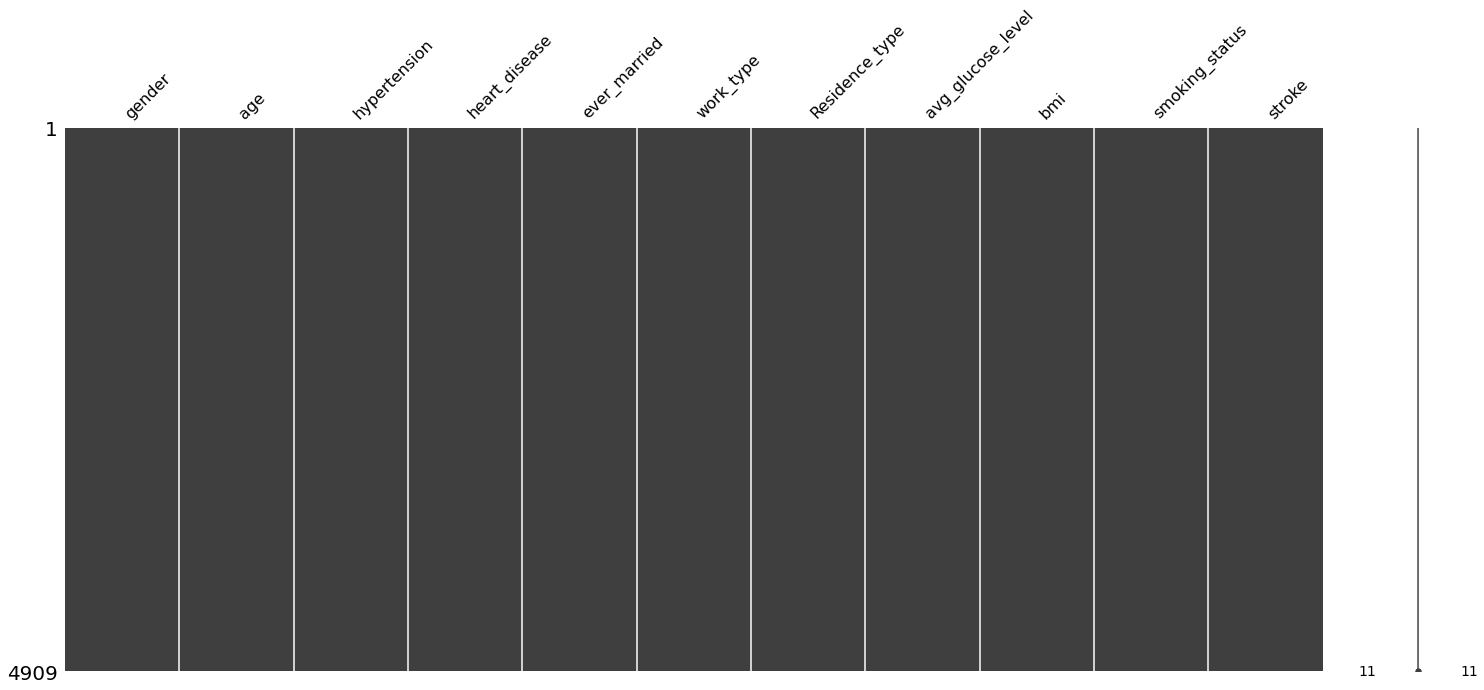

In [10]:
#visual check for missing values
missingno.matrix(df)

In [11]:
#preparing to check for inconsistent string values
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [12]:
#using a for loop to check for inconsistent object values (spelling errors) 
for col in str_cols:
  print(f'{col}:')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

gender:
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64



ever_married:
Yes    3204
No     1705
Name: ever_married, dtype: int64



work_type:
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64



Residence_type:
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64



smoking_status:
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64





>All object values are acceptable, except 'Other' in the gender column. Since there is only one record and it isn't specific enough, we will drop this record from our EDA.

In [15]:
#handling the outlier 'gender' value of 'Other' by indexing it
df.loc[df['gender']=='Other',:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [14]:
#dropping the record
df.drop(index = 3116, inplace = True)

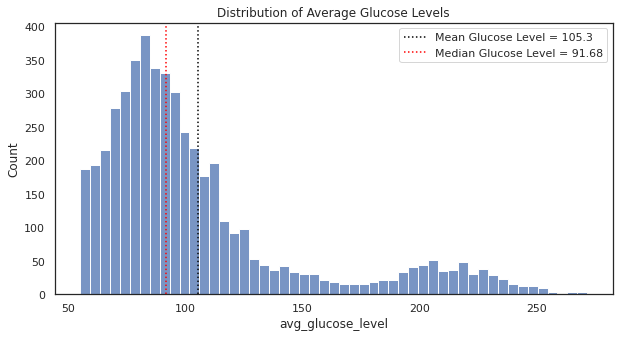

In [99]:
#univariate histogram for avg_glucose_level
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='avg_glucose_level', ax=ax)
ax.set(title='Distribution of Average Glucose Levels');

#annotating mean and median for avg_glucose_level
mean_glucose_level = df['avg_glucose_level'].mean()
ax.axvline(mean_glucose_level, color='black', ls=':', 
           label=f'Mean Glucose Level = {round(mean_glucose_level, 2)}');

med_glucose_level = df['avg_glucose_level'].median()
ax.axvline(med_glucose_level, color='red', ls=':',
           label=f'Median Glucose Level = {round(med_glucose_level, 2)}');

ax.legend();

>We have some outliers showing hyperglycemia for 180+ for glucose level. Diabetes for 200+.

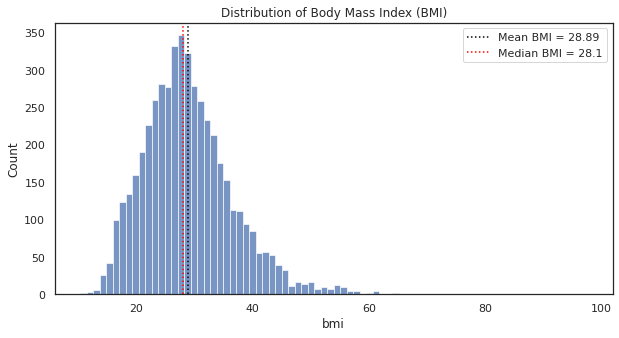

In [98]:
#univariate histogram for bmi
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='bmi', ax=ax)
ax.set(title='Distribution of Body Mass Index (BMI)');

#annotating mean and median for bmi
mean_bmi = df['bmi'].mean()
ax.axvline(mean_bmi, color='black', ls=':', 
           label=f'Mean BMI = {round(mean_bmi, 2)}');

med_bmi = df['bmi'].median()
ax.axvline(med_bmi, color='red', ls=':',
           label=f'Median BMI = {round(med_bmi, 2)}');

ax.legend();

>Our patients BMI show a distribution (bell shaped) that display a mean and median of around 28. That means our average patient is overweight, with some acceptable outliers.  

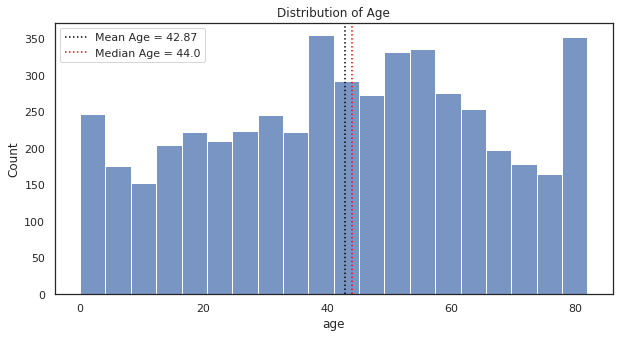

In [97]:
#univariate histogram for age
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='age', ax=ax)
ax.set(title='Distribution of Age');

#annotating mean and median for age
mean_age = df['age'].mean()
ax.axvline(mean_age, color='black', ls=':', 
           label=f'Mean Age = {round(mean_age, 2)}');

med_age = df['age'].median()
ax.axvline(med_age, color='red', ls=':',
           label=f'Median Age = {round(med_age, 2)}');

ax.legend();

>Age seems to distribute more toward a middle aged cohort.

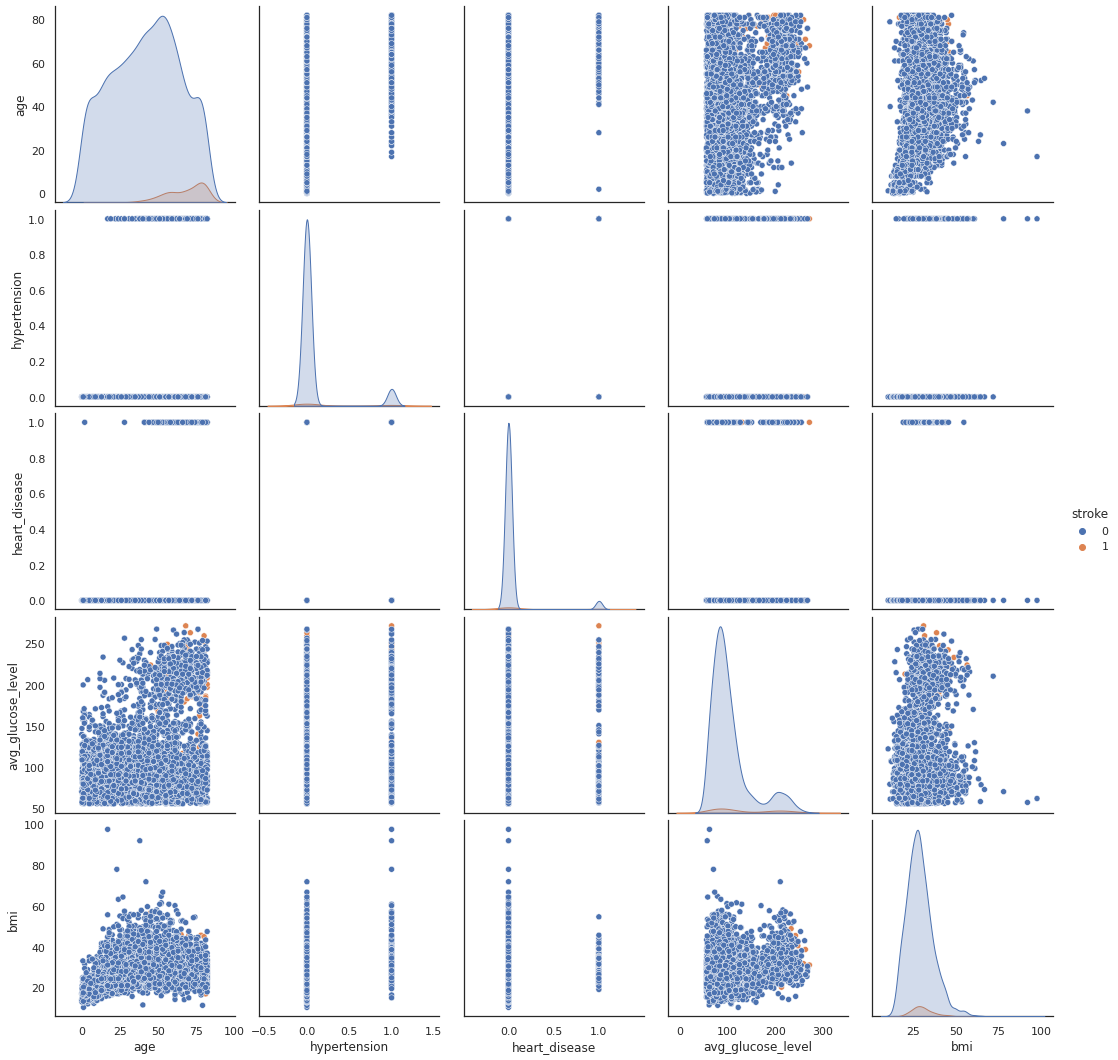

In [96]:
#scanning for insights in relation to hue stroke; 0 no stroke, 1 stroke
sns.pairplot(data = df, hue="stroke", height=3)

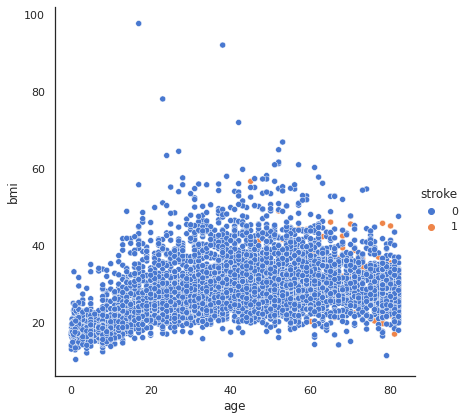

In [137]:
#drilling deeper by checking stroke (target) to view its relationship between bmi and age
sns.set_theme(style="white")

#0 does not have stroke, and 1 for had stroke
sns.relplot(x="age", y="bmi", hue="stroke",
            sizes=(80, 400), alpha=1, palette="muted",
            height=6, data=df)

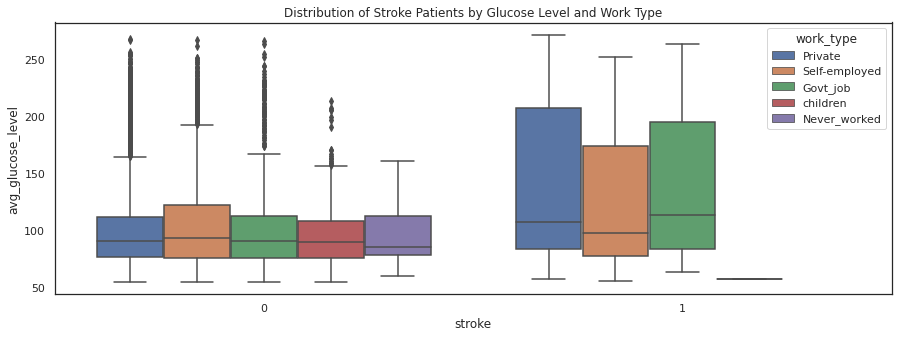

In [116]:
#checking for outliers among work_type with stroke categories
fig, ax = plt.subplots(figsize=(15,5))

ax.set(title='Distribution of Stroke Patients by Glucose Level and Work Type');
sns.boxplot(x = "stroke", y = "avg_glucose_level", 
            data = df, hue = "work_type")

This shows there are some patients who have high glucose levels but do not have stroke (extreme outliers) while patients with stroke show much higher distribution for high glucose levels (>150).

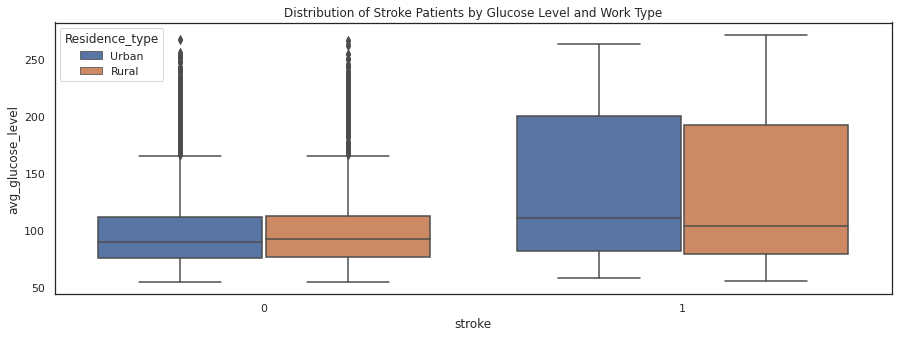

In [114]:
#checking for outliers among work_type with stroke categories
fig, ax = plt.subplots(figsize=(15,5))

ax.set(title='Distribution of Stroke Patients by Glucose Level and Work Type');
sns.boxplot(x = "stroke", y = "avg_glucose_level", 
            data = df, hue = "Residence_type")

>Residence type does not provide a distinction to stroke by glucose level.

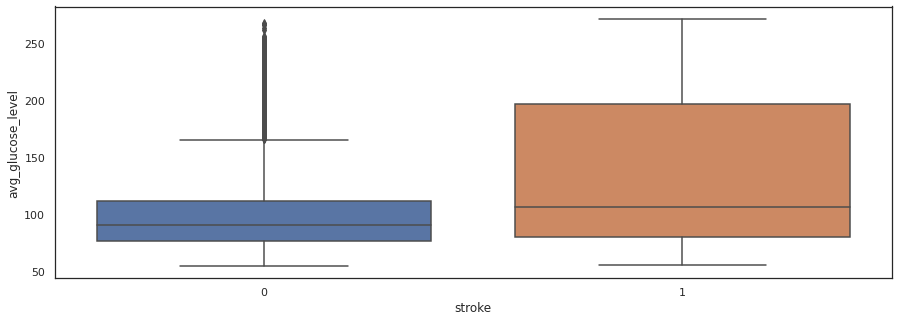

In [132]:
#checking for outliers among work_type with stroke categories
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = "stroke", y = "avg_glucose_level", 
            data = df)

>Patients with higher glucose levels contribute more to having a stroke (1).

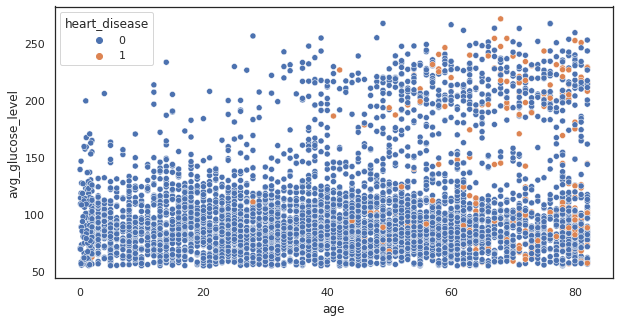

In [144]:
#checking heart disease trends among age and glucose levels
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot( x = "age", 
                 y = "avg_glucose_level", 
                 data = df, 
                 hue = "heart_disease")

>Ages 65+ show a relationship to having heart disease. Our sample is underrepresented, but we can see patients with heart disease trend toward older age groups.



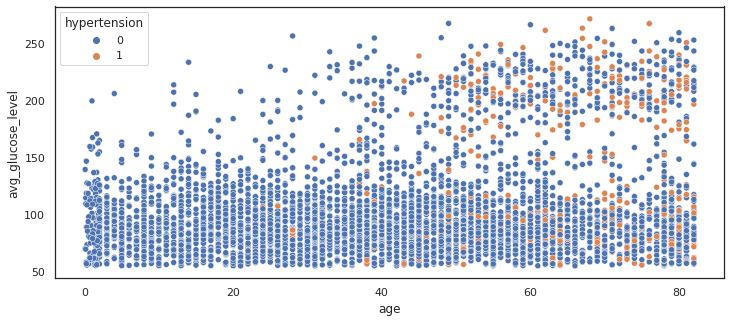

In [143]:
#checking hypertension trends among age and glucose levels
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot( x = "age", 
                 y = "avg_glucose_level", 
                 data = df, 
                 hue = "hypertension")

>Hypertension (1) is densely populated in the uper right quadrant of this scatter plot, displaying patients with high glucose levels from ages 40 to 80.

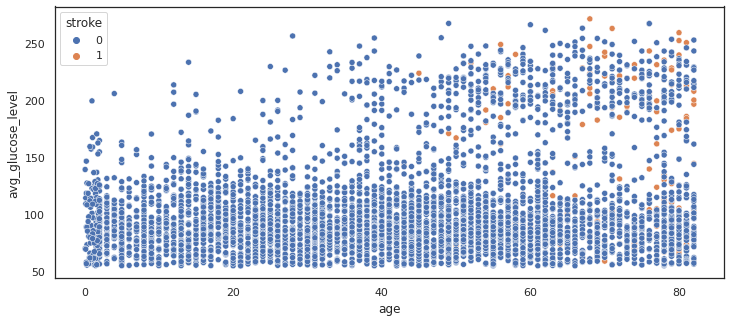

In [142]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot( x = "age", 
                 y = "avg_glucose_level", 
                 data = df, 
                 hue = "stroke")

>Stroke shows a distinct representation of age by glucose level. We can see that stroke seems to happen to around ages 45-80 more than the rest of the age values. Patients most impacted to stroke are those with high glucose levels and are 65+ in age.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

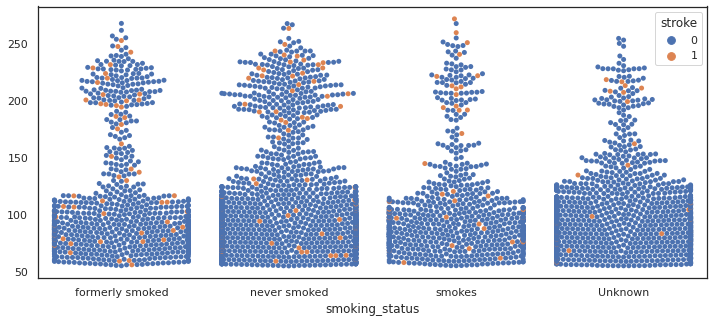

In [141]:
fig, ax = plt.subplots(figsize=(10,5))
sns.swarmplot(x='smoking_status', y='avg_glucose_level', data=df, 
              hue='stroke')
ax.set(ylabel="")

>No clear distinction of stroke in relation to smoking person type and BMI.

#Extra Information (for later use)

##Average Glucose Level Chart (Mean Blood mg/dL)

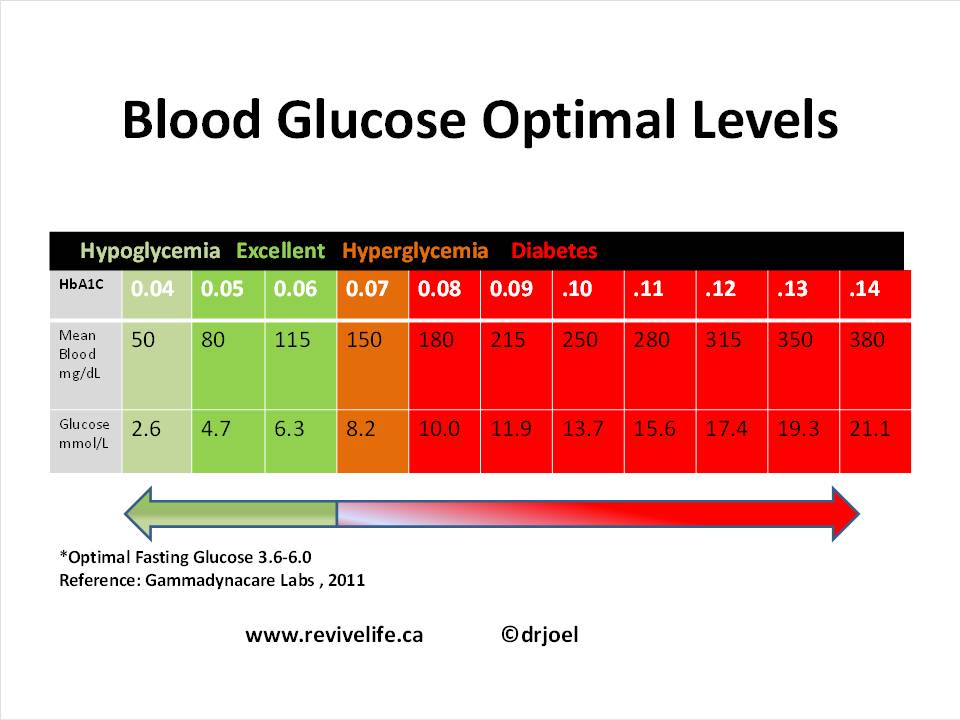

Source: https://www.health.gov.fj/diabetes-2/diabetes/

>We will establish a dictionary to make an ordinal scale of 'average_glucose_level' feature to supplement our EDA process and better understand the groups represented.

##BMI Visual Chart

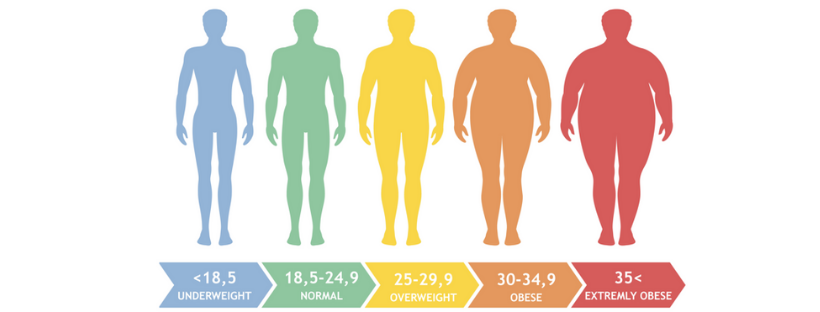

>BMI will use an ordinal strategy to drill deeper into our EDA process and discover some insights